In [2]:
from rdflib import Graph

# Load the EDAM ontology OWL file
owl_file_path = 'EDAM/EDAM_dev.owl'
g = Graph()
g.parse(owl_file_path, format='xml')

# SPARQL query to retrieve EDAM terms
sparql_query = """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX owl: <http://www.w3.org/2002/07/owl#>
    PREFIX edam: <http://edamontology.org/>

    SELECT ?term
    WHERE {
        ?term rdf:type owl:Class ;
              rdfs:subClassOf* edam:data_0006 .
    }
"""

# Execute the SPARQL query
results = g.query(sparql_query)

# Extract EDAM terms from the results
edam_terms = [str(result.term) for result in results]

# Print the list of EDAM terms
print(edam_terms)


['http://edamontology.org/data_0006', 'http://edamontology.org/data_0842', 'http://edamontology.org/data_0976', 'http://edamontology.org/data_0977', 'http://edamontology.org/data_1190', 'http://edamontology.org/data_1191', 'http://edamontology.org/data_1192', 'http://edamontology.org/data_1193', 'http://edamontology.org/data_1194', 'http://edamontology.org/data_1195', 'http://edamontology.org/data_0982', 'http://edamontology.org/data_0984', 'http://edamontology.org/data_0987', 'http://edamontology.org/data_2706', 'http://edamontology.org/data_0990', 'http://edamontology.org/data_0997', 'http://edamontology.org/data_0998', 'http://edamontology.org/data_0999', 'http://edamontology.org/data_1000', 'http://edamontology.org/data_1001', 'http://edamontology.org/data_1005', 'http://edamontology.org/data_1007', 'http://edamontology.org/data_2899', 'http://edamontology.org/data_1009', 'http://edamontology.org/data_1012', 'http://edamontology.org/data_1013', 'http://edamontology.org/data_2755', 

In [ ]:
# Download them...

## Via CSV from the bioportal page

https://data.bioontology.org/ontologies/EDAM/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb&download_format=csv

In [82]:
import pandas as pd

edam_data = pd.read_csv("EDAM/EDAM.csv")
edam_topics = edam_data['Preferred Label']

In [83]:
edam_topics.to_csv("EDAM/full_edam_list.txt", header=False, index=False)

### NOTE:

Currently quotes (single and double) (and forward slashes?) need to be manually purged from the data. 

In [219]:
import pandas as pd

edam_data = pd.read_csv("EDAM/EDAM.csv")

In [220]:
edam_data = edam_data[edam_data['Class ID'].str.startswith("http://edamontology.org/topic_")].sort_values(by='Preferred Label')

In [221]:
edam_data.head()

,Class ID,Preferred Label,Synonyms,Definitions,Obsolete,CUI,Semantic Types,Parents,Citation,Created in,...,Old parent,Old related,Ontology used,Organisation,refactor_candidate,refactor_comment,Regular expression,Related term,Repository,thematic_editor
2996,http://edamontology.org/topic_3521,2D PAGE experiment,NaN,Two-dimensional gel electrophoresis experiment...,True,NaN,NaN,http://www.w3.org/2002/07/owl#DeprecatedClass,NaN,1.8,...,http://www.w3.org/2002/07/owl#Thing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002,http://edamontology.org/topic_0174,Ab initio structure prediction,NaN,The prediction of three-dimensional structure ...,True,NaN,NaN,http://www.w3.org/2002/07/owl#DeprecatedClass,NaN,beta12orEarlier,...,http://www.w3.org/2002/07/owl#Thing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,http://edamontology.org/topic_4029,Acoustics,NaN,"The study of mechanical waves in liquids, soli...",False,NaN,NaN,http://edamontology.org/topic_3318,NaN,1.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3366,http://edamontology.org/topic_3810,Agricultural science,Agriculture|Agronomy|Agroecology|Animal breedi...,"Multidisciplinary study, research and developm...",False,NaN,NaN,http://edamontology.org/topic_3070,NaN,1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3329,http://edamontology.org/topic_0083,Alignment,NaN,The alignment (equivalence between sites) of m...,True,NaN,NaN,http://www.w3.org/2002/07/owl#DeprecatedClass,NaN,beta12orEarlier,...,http://www.w3.org/2002/07/owl#Thing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove Topics

'Laboratory techniques', 'Literature and language',  'Experimental design and studies', and 'Mathematics' and all children

### Drop topics whose "Parents" are part of a deprecated class


In [222]:
edam_data[~edam_data['Parents'].str.contains("http://edamontology.org/topic_")].head()[['Class ID', 'Preferred Label', 'Parents']]

,Class ID,Preferred Label,Parents
2996,http://edamontology.org/topic_3521,2D PAGE experiment,http://www.w3.org/2002/07/owl#DeprecatedClass
3002,http://edamontology.org/topic_0174,Ab initio structure prediction,http://www.w3.org/2002/07/owl#DeprecatedClass
3329,http://edamontology.org/topic_0083,Alignment,http://www.w3.org/2002/07/owl#DeprecatedClass
1690,http://edamontology.org/topic_0786,Arabidopsis,http://www.w3.org/2002/07/owl#DeprecatedClass
2435,http://edamontology.org/topic_3075,Biological system modelling,http://www.w3.org/2002/07/owl#DeprecatedClass


In [223]:
edam_data = edam_data[edam_data['Parents'].str.contains("http://edamontology.org/topic_")]

In [224]:
edam_data['Parents #'] = edam_data['Parents'].str.extractall(r'topic_(\d+)').groupby(level=0).agg(lambda parents: parents.tolist())

In [225]:
edam_data['Topic #'] = edam_data['Class ID'].apply(lambda url: url.split('topic_')[1])

### Remove topics based on Parent ID

Laboratory Techniques - 3361

Literate and Language - 3068

Experimental design and studies - 3678

Mathematics - 3315

In [226]:
from collections import defaultdict

topics = ['4019', '3314', '3316', '3071', '3855', '0605', '4010', '3318', '3361', '3068', '3678', '3315']

subtopics = defaultdict(lambda: [])

def get_children_topics(parent_id):
    # children_ids = edam_data[edam_data['Parents'].str.contains(parent_id)]['Class ID'].apply(lambda url: url.split('topic_')[1]).to_list()
    children_ids = edam_data[edam_data['Parents #'].apply(\
        lambda parent_ids: parent_id in parent_ids)]['Topic #'].to_list()
    
    if not len(children_ids):
        return []
    
    # print(parent_id, children_ids)
    
    grandchildren = []
    for child_id in children_ids:
        grandchildren.append(get_children_topics(child_id))
    
    children_ids.append(grandchildren)
    return children_ids

for parent_topic in topics:
    subtopics[parent_topic] = get_children_topics(parent_topic)

In [227]:
# Flatten each topics lists
for key, value in subtopics.items():
    print(f"{key}: {value}")

def flatten_list(nested_list):
    flattened = []
    for item in nested_list:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

# Flatten each value in the dictionary
flattened_dict = {key: flatten_list(value) for key, value in subtopics.items()}

# Print the flattened dictionary
print()
for key, value in flattened_dict.items():
    print(f"{key}: {value}")

4019: ['3070', '3344', '3307', '0610', '3303', '3391', [['3810', '3292', '3360', '3306', '3297', '2229', '3369', '3064', '3299', '3573', '3053', '2815', '3387', '3301', '0621', '3047', '0780', '1317', '3895', '2259', '0781', '3500', [[], ['4030', [[]]], [], [], ['3398', '3368', '3912', '3576', '3939', '4030', '3895', [[], [], [], [], [], [], []]], [], [], ['3065', [[]]], ['3945', '3298', '0084', '0637', [[], [], ['3944', '3293', [[], []]], []]], [], ['3295', '3912', '0625', '3574', '3930', '3321', '3056', [['3173', '4037', [[], []]], [], ['3974', '3945', '3298', '3055', [[], [], [], []]], [], [], ['3959', '0623', '0203', '0114', '0199', [[], ['2830', [[]]], ['0204', '3941', '3320', '0749', '3308', [[], [], [], [], ['3941', '4027', [[], []]]]], ['0659', '3512', '0798', [[], [], []]], ['2533', '2885', '3175', [[], [], ['3958', [[]]]]]]], []]], [], [], ['4013', '3697', [[], ['4038', [[]]]]], [], [], [], ['0611', '0593', '3448', '0122', '2828', [['4017', [[]]], [], [], [], []]], [], [], []

In [228]:
topics_to_remove = ['3361', '3068', '3678', '3315']
topics_to_keep = ['4019', '3314', '3316', '3071', '3855', '0605', '4010', '3318']

for key in ['3361', '3068', '3678', '3315']:
    topics_to_remove.extend(flattened_dict[key])

for key in ['4019', '3314', '3316', '3071', '3855', '0605', '4010', '3318']:
    topics_to_keep.extend(flattened_dict[key])

topics_to_remove, topics_to_keep = set(topics_to_remove), set(topics_to_keep)

print('Number of Topics to remove: ', len([item for item in topics_to_remove if item not in topics_to_keep]))

Number of Topics to remove:  36


In [229]:
edam_data[edam_data['Topic #'].apply(lambda topic: topic in topics_to_remove and topic not in topics_to_keep)][['Class ID', 'Preferred Label']]

,Class ID,Preferred Label
2963,http://edamontology.org/topic_3569,Applied mathematics
2501,http://edamontology.org/topic_3383,Bioimaging
1106,http://edamontology.org/topic_3179,ChIP-on-chip
52,http://edamontology.org/topic_3169,ChIP-seq
1748,http://edamontology.org/topic_3940,Chromosome conformation capture
399,http://edamontology.org/topic_3934,Cytometry
983,http://edamontology.org/topic_3954,Echography
3311,http://edamontology.org/topic_3676,Exome sequencing
2546,http://edamontology.org/topic_3678,Experimental design and studies
2841,http://edamontology.org/topic_3517,GWAS study


In [230]:
edam_data = edam_data[~edam_data['Topic #'].apply(lambda topic: topic in topics_to_remove and topic not in topics_to_keep)]

In [231]:
# Note, all children of the above topics are removed even if they are a child of another topic. Adjust code if necessary for the other behavior

edam_data['Preferred Label'].to_csv("EDAM/edam_topics.txt", header=False, index=False)

## Verify topics in EDAM topic list and dataset

In [232]:
dataset = pd.read_csv('datasets/staging_test_set.csv')

In [233]:
with open('EDAM/edam_topics.txt', 'r') as edam_file:
    edam_topics = edam_file.readlines()

edam_topics = [topic.strip() for topic in edam_topics]

In [234]:
# Convert EDAM topics from string to list (CSV stores lists as strings, so it needs to be reverted)
import ast

dataset['EDAM Topics'] = dataset['EDAM Topics'].apply(lambda edam_list: ast.literal_eval(edam_list))

In [235]:
indices_true = dataset.loc[dataset['EDAM Topics'].apply(lambda edam_list: not all(term in edam_topics for term in edam_list))].index

In [236]:
for index in indices_true:
    edam_list = dataset.loc[index, 'EDAM Topics']
    terms_not_in_edam_topics = [term for term in edam_list if term not in edam_topics]
    
    print(f"Index {index}: Terms not in edam_topics: {terms_not_in_edam_topics}")

Index 0: Terms not in edam_topics: ['cel', 'CellML', 'Cell type accession', 'Pathway ID (Panther)', 'Panther Pathways entry format', 'Cell line name', 'Cell line report', 'Cell line name (exact)', 'Analysis', 'Protein analysis', 'CWL', 'Genbank common name', 'RNAVirusDB ID', 'Virus identifier', 'Infectious tropical disease', 'Laboratory techniques', 'Gene ID', 'GWAS study', 'Rate of association', 'Genome annotation', 'Pathogens', 'Protein interaction ID', 'Human disease', 'Mice or rats', 'Rice', 'Phosphorylation sites', 'Virus annotation', 'Gramene secondary identifier']
Index 1: Terms not in edam_topics: ['protein', 'Rate of association', 'Image metadata', 'System metadata', 'STRIDE log file', 'Two-dimensional gel electrophoresis', 'Editing', 'Sequence editing', 'Training material', 'Protein signal peptide detection (bacteria)', 'geneseq', 'Phosphorylation sites', 'Keyword', 'selex', 'selex sequence format', 'Lipoproteins']
Index 2: Terms not in edam_topics: ['Regular expression', 'Ge

In [237]:
dataset['EDAM Topics'] = dataset['EDAM Topics'].apply(lambda edam_list: [topic for topic in edam_list if topic in edam_topics])

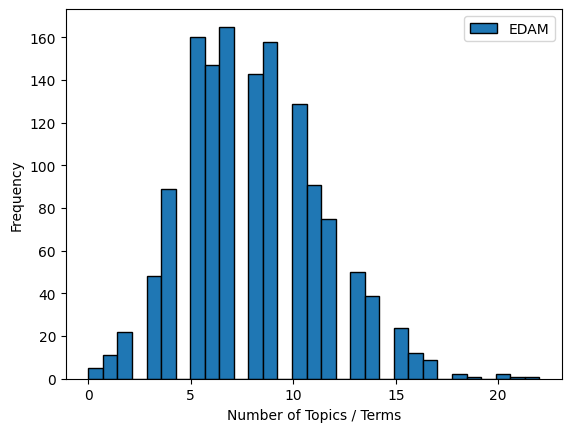

In [238]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(dataset['EDAM Topics'].apply(len), bins='auto', edgecolor='black')

plt.xlabel('Number of Topics / Terms')
plt.ylabel('Frequency')
    
plt.legend(['EDAM'])

In [197]:
dataset['EDAM Topics'].head()

0    [Zoology, Laboratory animal science, Animal st...
1    [Systems biology, Systems medicine, Proteins, ...
2       [Gene expression, Gene regulation, Physiology]
3    [Infectious disease, Microbiology, Microbial c...
4    [Biology, Infectious disease, Protein interact...
Name: EDAM Topics, dtype: object